<a href="https://colab.research.google.com/github/Luckas33/MetodosNumericos/blob/master/TrabalhoComputacional_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

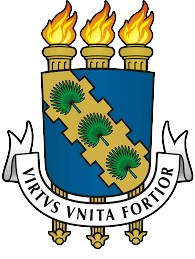
# Universidade Federal do Ceará  
## Departamento de Computação  

---

### Disciplina: **Métodos Numéricos**  
**Professor:** João Paulo do Vale Madeiro  

---

### **Alunos:**
- Lucas de Oliveira Sobral, 556944
- Mateus Andrade Maia, 552593

Link para vídeo de apresentação:


# TRABALHO COMPUTACIONAL 2

### 1) Considere os dados abaixo

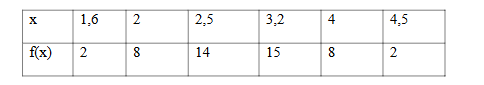


(a)Obter e plotar o gráfico da spline quadrática que passa pelos pontos dados;





In [19]:
"Importando as bibliotecas básicas"
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def subs_retroativas_np(A, b):
    """Resolve Ax=b para uma matriz triangular superior A."""
    n = len(A)
    x = np.zeros(n, dtype=float)
    for i in range(n - 1, -1, -1):
        soma = A[i, i + 1:] @ x[i + 1:]
        x[i] = (b[i] - soma) / A[i, i]
    return x


In [21]:
def gauss_np(A, b):
    """Eliminação Gaussiana usando NumPy."""
    # É uma boa prática não modificar as matrizes originais
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(A)

    for k in range(n - 1):
        # Verificação de pivô zero (evita ZeroDivisionError)
        if abs(A[k, k]) < 1e-10:
            # Retorna None para indicar que a matriz é singular
            return None

        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            # Operações de linha vetorizadas com NumPy (muito mais eficientes)
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]

    return subs_retroativas_np(A, b)

In [22]:
def gauss_np(A, b):
    """
    Aplica a eliminação Gaussiana com Pivoteamento Parcial para resolver Ax=b.
    Esta é uma implementação robusta e numericamente estável.
    """
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(A)

    for k in range(n - 1):
        # --- Início do Pivoteamento Parcial ---
        max_row_idx = k + np.argmax(np.abs(A[k:, k]))
        if abs(A[max_row_idx, k]) < 1e-12:
            return None
        if max_row_idx != k:
            A[[k, max_row_idx]] = A[[max_row_idx, k]]
            b[[k, max_row_idx]] = b[[max_row_idx, k]]
        # --- Fim do Pivoteamento ---

        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]

    if abs(A[n-1, n-1]) < 1e-12:
        return None

    return subs_retroativas_np(A, b)

In [23]:
def quadratic_spline_coeffs(x_points, y_points):
    """Monta e resolve o sistema de equações para a spline quadrática."""
    n = len(x_points) - 1
    A = np.zeros((3 * n, 3 * n))
    b = np.zeros(3 * n)

    for i in range(n):
        A[2*i, 3*i:3*(i+1)] = [x_points[i]**2, x_points[i], 1]
        b[2*i] = y_points[i]
        A[2*i+1, 3*i:3*(i+1)] = [x_points[i+1]**2, x_points[i+1], 1]
        b[2*i+1] = y_points[i+1]

    for i in range(n - 1):
        row_idx = 2 * n + i
        A[row_idx, 3*i] = 2 * x_points[i+1]
        A[row_idx, 3*i+1] = 1
        A[row_idx, 3*(i+1)] = -2 * x_points[i+1]
        A[row_idx, 3*(i+1)+1] = -1

    # Condição de contorno robusta: a_0 = 0
    A[3*n-1, 0] = 1
    b[3*n-1] = 0

    solution = gauss_np(A, b)

    if solution is None:
        print("Erro: O sistema de equações é singular ou o solver falhou.")
        return None

    coeffs = solution.reshape((n, 3))
    return coeffs

In [24]:
def evaluate_quadratic_spline(x_points, coeffs, x_eval):
    """Avalia a spline quadrática em um determinado ponto x_eval."""
    for i in range(len(x_points) - 1):
        if x_points[i] <= x_eval <= x_points[i+1]:
            a, b, c = coeffs[i]
            return a * x_eval**2 + b * x_eval + c
    if x_eval < x_points[0]:
        a, b, c = coeffs[0]
    else:
        a, b, c = coeffs[-1]
    return a * x_eval**2 + b * x_eval + c



Coeficientes (a, b, c) calculados para cada segmento:
Segmento 0 ([1.6, 2.0]) 	: S(x) =  0.0000x² + 15.0000x + -22.0000
Segmento 1 ([2.0, 2.5]) 	: S(x) = -6.0000x² + 39.0000x + -46.0000
Segmento 2 ([2.5, 3.2]) 	: S(x) = -10.8163x² + 63.0816x + -76.1020
Segmento 3 ([3.2, 4.0]) 	: S(x) = -3.2589x² + 14.7143x +  1.2857
Segmento 4 ([4.0, 4.5]) 	: S(x) = -1.2857x² + -1.0714x + 32.8571


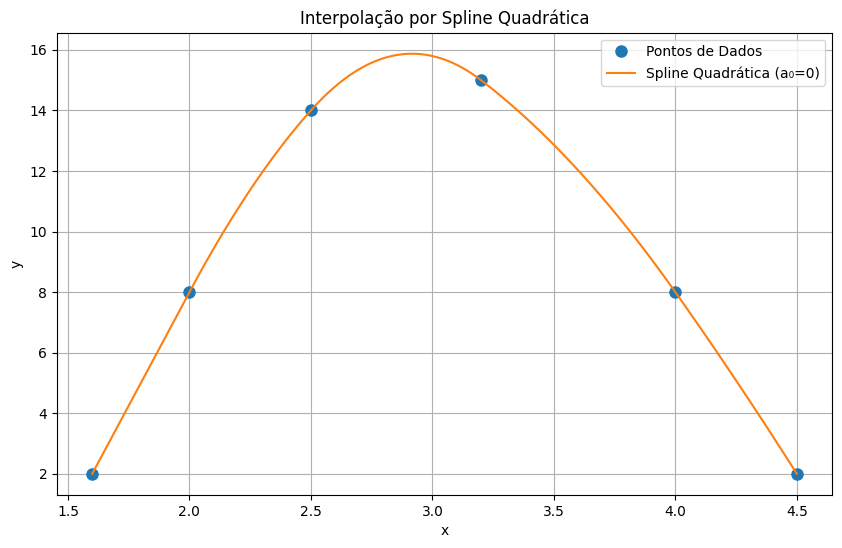

In [25]:
# --- Bloco Principal de Execução ---
if __name__ == '__main__':
    x_points = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
    y_points = np.array([2, 8, 14, 15, 8, 2])

    coeffs = quadratic_spline_coeffs(x_points, y_points)

    if coeffs is not None:
        print("Coeficientes (a, b, c) calculados para cada segmento:")
        for i, (a, b, c) in enumerate(coeffs):
            print(f"Segmento {i} ([{x_points[i]}, {x_points[i+1]}]) \t: S(x) = {a:7.4f}x² + {b:7.4f}x + {c:7.4f}")

        x_fine = np.linspace(min(x_points), max(x_points), 500)
        y_fine = [evaluate_quadratic_spline(x_points, coeffs, x) for x in x_fine]

        plt.figure(figsize=(10, 6))
        plt.plot(x_points, y_points, 'o', markersize=8, label='Pontos de Dados')
        plt.plot(x_fine, y_fine, '-', label='Spline Quadrática (a₀=0)')
        plt.title('Interpolação por Spline Quadrática')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()


(b)Obter e plotar o gráfico da spline cúbica que passa pelos pontos dados;

In [26]:
def cubic_spline_coeffs(x, y):
    n = len(x) - 1
    h = np.diff(x)

    # Monta matriz A e vetor b
    A = np.zeros((n-1, n-1))
    bvec = np.zeros(n-1)
    for i in range(1, n):
        A[i-1, i-1] = (h[i-1] + h[i]) / 3
        if i-1 > 0:
            A[i-1, i-2] = h[i-1] / 6
        if i < n-1:
            A[i-1, i] = h[i] / 6
        bvec[i-1] = ( (y[i+1]-y[i])/h[i] ) - ( (y[i]-y[i-1])/h[i-1] )

    # Resolve usando eliminação de Gauss
    M_internal = gauss_np(A, bvec)

    # Monta vetor completo M
    M = np.zeros(n+1)
    M[1:n] = M_internal
    return M

In [27]:
def evaluate_cubic_spline(x_val, x, y, M):
    for i in range(len(x)-1):
        if x[i] <= x_val <= x[i+1]:
            h = x[i+1] - x[i]
            term1 = (M[i] * (x[i+1]-x_val)**3) / (6*h)
            term2 = (M[i+1] * (x_val-x[i])**3) / (6*h)
            term3 = (y[i]/h - M[i]*h/6) * (x[i+1]-x_val)
            term4 = (y[i+1]/h - M[i+1]*h/6) * (x_val-x[i])
            return term1 + term2 + term3 + term4
    return None

In [28]:
def print_segment_polynomials(x_pts, y_pts, M):
    """
    Imprime cada segmento do spline cúbico na forma:
    S_i(x) = ax^3 + bx^2 + cx + d
    com coeficientes numéricos (4 casas decimais)
    """
    n = len(x_pts) - 1
    for i in range(n):
        h = x_pts[i+1] - x_pts[i]
        xi = x_pts[i]
        xi1 = x_pts[i+1]
        Mi, Mi1 = M[i], M[i+1]
        yi, yi1 = y_pts[i], y_pts[i+1]

        # Função auxiliar para expandir (x - base)^3
        def expand_term(base, factor):
            a = factor
            b = -3 * factor * base
            c = 3 * factor * base**2
            d = -factor * base**3
            return np.array([a, b, c, d])

        # Termos da fórmula do spline
        # 1º termo: (Mi * (xi1 - x)^3)/(6*h) = (-Mi/(6*h)) * (x - xi1)^3
        coef1 = expand_term(xi1, -Mi/(6*h))
        # 2º termo: (Mi1 * (x - xi)^3)/(6*h)
        coef2 = expand_term(xi, Mi1/(6*h))

        # 3º termo: ( (yi/h - Mi*h/6) * (xi1 - x) )
        K1 = (yi/h - Mi*h/6)
        coef3 = np.array([0, -K1, K1*xi1, 0])  # -K1*x + K1*xi1

        # 4º termo: ( (yi1/h - Mi1*h/6) * (x - xi) )
        K2 = (yi1/h - Mi1*h/6)
        coef4 = np.array([0, K2, -K2*xi, 0])  # K2*x - K2*xi

        # Soma dos coeficientes
        total_coef = coef1 + coef2 + coef3 + coef4
        a, b, c, d = total_coef

        # Impressão formatada
        print(f"S_{i}(x) = {a:.4f}x^3 + {b:.4f}x^2 + {c:.4f}x + {d:.4f}")

Funções do spline cúbico:
S_0(x) = -1.6982x^3 + 23.4228x^2 + -35.4765x + 6.9556
S_1(x) = -5.7508x^3 + 45.9047x^2 + -78.5452x + 35.6477
S_2(x) = 1.6075x^3 + -22.0790x^2 + 105.0641x + -112.1702
S_3(x) = 2.4087x^3 + -40.7034x^2 + 175.9591x + -173.7737
S_4(x) = 1.0050x^3 + -25.8182x^2 + 118.1818x + -91.5769


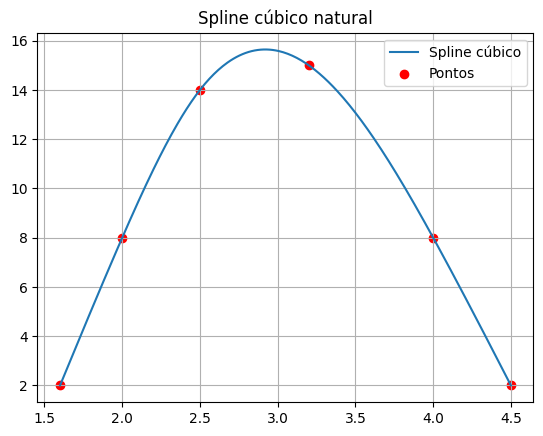

In [29]:
x_pts = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
y_pts = np.array([2, 8, 14, 15, 8, 2])

M = cubic_spline_coeffs(x_pts, y_pts)

# Print das funções de cada intervalo
print("Funções do spline cúbico:")
print_segment_polynomials(x_pts, y_pts, M)

# Gráfico
x_vals = np.linspace(1.6, 4.5, 300)
y_vals = [evaluate_cubic_spline(val, x_pts, y_pts, M) for val in x_vals]

plt.plot(x_vals, y_vals, label='Spline cúbico')
plt.scatter(x_pts, y_pts, color='red', label='Pontos')
plt.legend()
plt.grid(True)
plt.title("Spline cúbico natural")
plt.show()

(c)Estimar o valor de f(2,8) pelos dois métodos referidos acima.

In [30]:
def evaluate_spline_quadratica(x_points, coeffs, x_alvo):
    """Avalia a spline quadrática em um ponto x_alvo."""
    for i in range(len(x_points) - 1):
        if x_points[i] <= x_alvo <= x_points[i+1]:
            a, b, c = coeffs[i]
            return a * x_alvo**2 + b * x_alvo + c
    return np.nan

--- Interpolação por Spline Quadrática ---

Coeficientes (a, b, c) calculados para cada segmento:
  Segmento 0 ([1.6, 2.0]): S(x) =   0.0000x² +  15.0000x + -22.0000
  Segmento 1 ([2.0, 2.5]): S(x) =  -6.0000x² +  39.0000x + -46.0000
  Segmento 2 ([2.5, 3.2]): S(x) = -10.8163x² +  63.0816x + -76.1020
  Segmento 3 ([3.2, 4.0]): S(x) =  -3.2589x² +  14.7143x +   1.2857
  Segmento 4 ([4.0, 4.5]): S(x) =  -1.2857x² +  -1.0714x +  32.8571
------------------------------------------------------------
Resultado da Estimação: f(2.8) ≈ 15.7265
------------------------------------------------------------


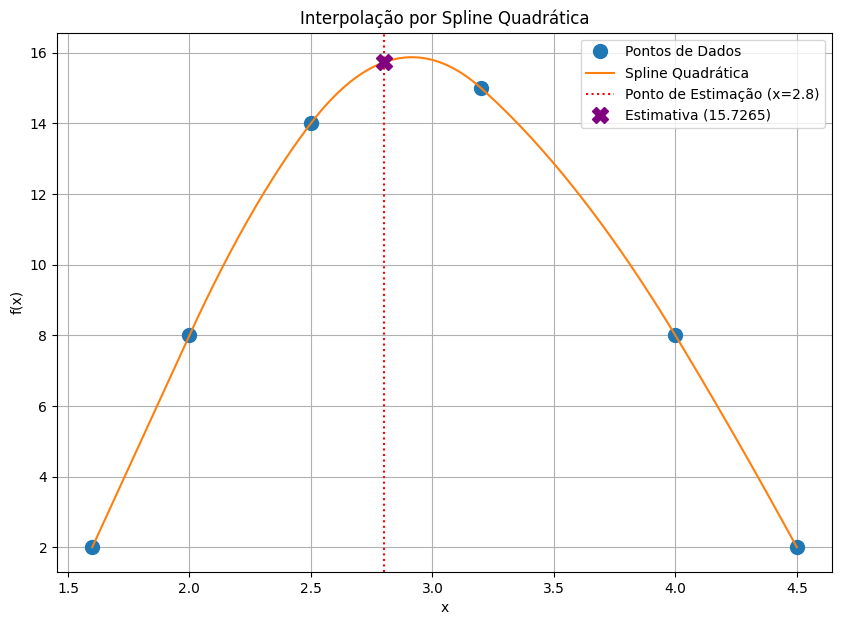

In [31]:
if __name__ == '__main__':
    # Seus dados
    x_points = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
    y_points = np.array([2, 8, 14, 15, 8, 2])

    # Ponto onde queremos estimar f(x)
    x_alvo = 2.8

    print("--- Interpolação por Spline Quadrática ---\n")

    # Calcula os coeficientes da spline quadrática
    coeffs_quad = quadratic_spline_coeffs(x_points, y_points)

    if coeffs_quad is not None:
        print("Coeficientes (a, b, c) calculados para cada segmento:")
        for i, (a, b, c) in enumerate(coeffs_quad):
            print(f"  Segmento {i} ([{x_points[i]:.1f}, {x_points[i+1]:.1f}]): S(x) = {a:8.4f}x² + {b:8.4f}x + {c:8.4f}")

        print("-" * 60)

        # Estima o valor no ponto desejado
        y_estimado = evaluate_spline_quadratica(x_points, coeffs_quad, x_alvo)
        print(f"Resultado da Estimação: f({x_alvo}) ≈ {y_estimado:.4f}")
        print("-" * 60)

        # --- Visualização Gráfica ---
        plt.figure(figsize=(10, 7))
        plt.plot(x_points, y_points, 'o', markersize=10, label='Pontos de Dados')

        x_fine = np.linspace(min(x_points), max(x_points), 500)
        y_fine = [evaluate_spline_quadratica(x_points, coeffs_quad, x) for x in x_fine]
        plt.plot(x_fine, y_fine, '-', label='Spline Quadrática')

        plt.axvline(x=x_alvo, color='r', linestyle=':', label=f'Ponto de Estimação (x={x_alvo})')
        plt.plot(x_alvo, y_estimado, 'X', color='purple', markersize=12, label=f'Estimativa ({y_estimado:.4f})', zorder=10)

        plt.title('Interpolação por Spline Quadrática')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

In [32]:
# Spline Cúbica
valor_28 = evaluate_cubic_spline(2.8, x_pts, y_pts, M)
print("f(2.8) pelo spline cúbico =", valor_28)

f(2.8) pelo spline cúbico = 15.515354832040089


### 2) Use  interpolação  por  spline  cúbica  para  a  representação  dos  dados  abaixo,  e determine o valor de 𝑥que corresponde a 𝑓(𝑥)=0,23 para os seguintes dados tabulados através da solução de um problema de raiz do correspondente polinômio cúbico.

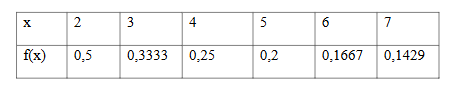

### 3) Efetue  o downloaddo datasetShampoo Sales  Dataset1,  no  ambiente  Python,o qual descreve o número de vendas mensais de shampoo longo de um período de três anos,e utilizando o processo de interpolação por spline cúbica, efetue o processo de up sampling para obter estimativas diárias de vendas.
https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv


In [33]:
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3
"1-05",180.3
"1-06",168.5
"1-07",231.8
"1-08",224.5
"1-09",192.8
"1-10",122.9
"1-11",336.5
"1-12",185.9
"2-01",194.3
"2-02",149.5
"2-03",210.1
"2-04",273.3
"2-05",191.4
"2-06",287.0
"2-07",226.0
"2-08",303.6
"2-09",289.9
"2-10",421.6
"2-11",264.5
"2-12",342.3
"3-01",339.7
"3-02",440.4
"3-03",315.9
"3-04",439.3
"3-05",401.3
"3-06",437.4
"3-07",575.5
"3-08",407.6
"3-09",682.0
"3-10",475.3
"3-11",581.3
"3-12",646.9

('3-12', 646.9)